In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import datetime
import warnings

In [305]:
# merging two csv files
bikes = pd.concat(
    map(pd.read_csv, ['train.csv', 'test.csv']), ignore_index=True)


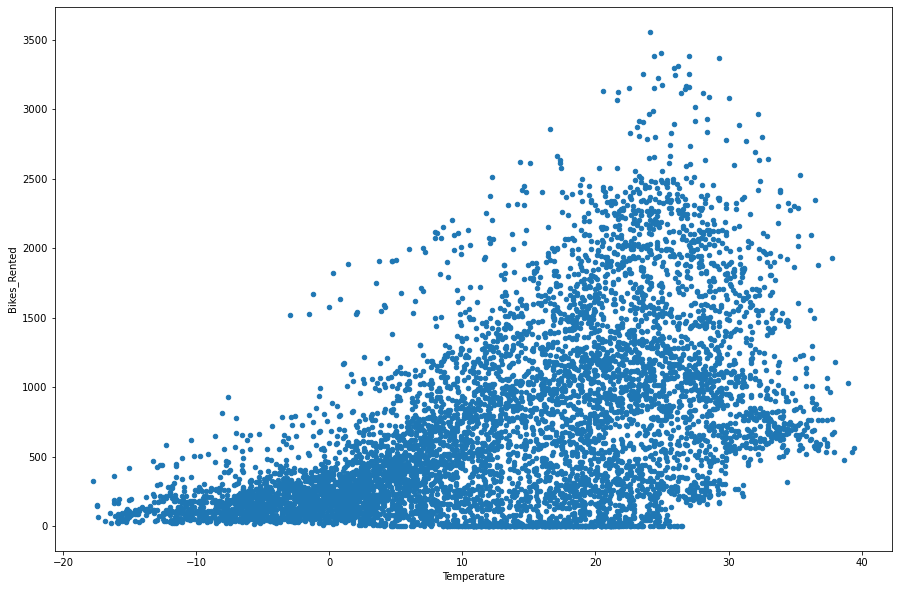

In [306]:
bikes #show the dataframe

ax2 = bikes.plot.scatter(x='Temperature',
                      y='Bikes_Rented',
                      colormap='viridis',figsize=(15,10))


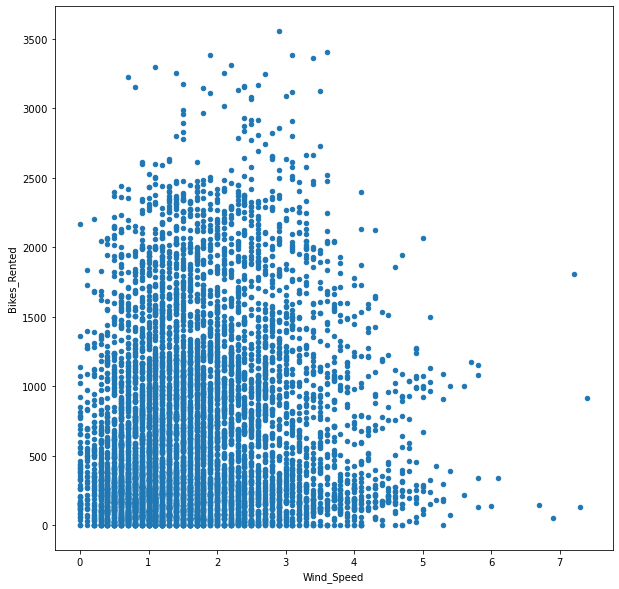

In [307]:

ax4 = bikes.plot.scatter(x='Wind_Speed',y='Bikes_Rented',colormap='viridis',figsize=(10,10))

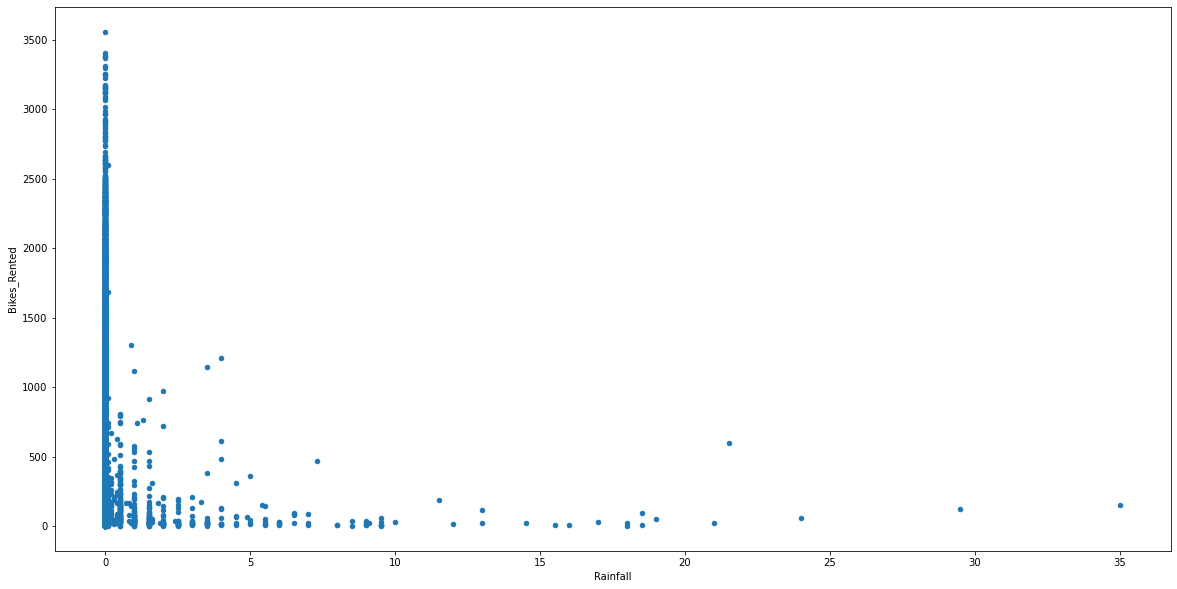

In [308]:
ax3 = bikes.plot.scatter(x='Rainfall',
                      y='Bikes_Rented',
                      colormap='viridis',figsize=(20,10))

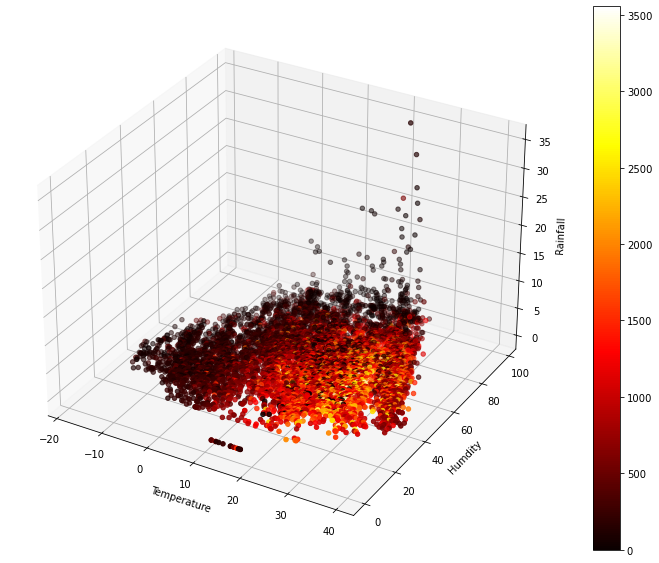

In [309]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

x = bikes['Temperature']
y = bikes['Humidity']
z = bikes['Rainfall']
c = bikes['Bikes_Rented']




img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)


plt.xlabel("Temperature")
plt.ylabel("Humdity")
ax.set_zlabel("Rainfall")
plt.show()

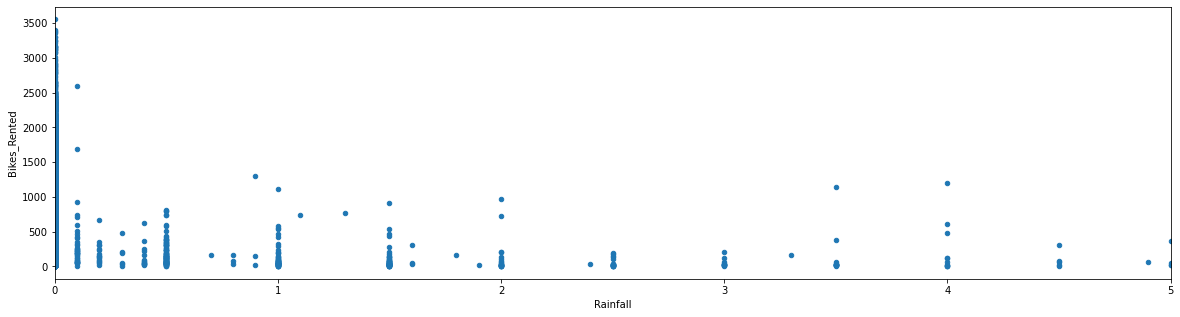

In [310]:
ax6 = bikes.plot.scatter(x='Rainfall',
                      y='Bikes_Rented',
                      colormap='viridis',figsize=(20, 5),xlim=(0,5))


In [311]:
bikes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                8760 non-null   int64  
 1   Date              8760 non-null   object 
 2   Hour              8760 non-null   int64  
 3   Temperature       8760 non-null   float64
 4   Humidity          8760 non-null   int64  
 5   Wind_Speed        8760 non-null   float64
 6   Visibility        8760 non-null   int64  
 7   Dew_Point         8760 non-null   float64
 8   Solar_Radiation   8760 non-null   float64
 9   Rainfall          8760 non-null   float64
 10  Snowfall          8760 non-null   float64
 11  Season            8760 non-null   object 
 12  IsHoliday         8760 non-null   int64  
 13  IsFunctioningDay  8760 non-null   int64  
 14  Bikes_Rented      7260 non-null   float64
dtypes: float64(7), int64(6), object(2)
memory usage: 1.0+ MB


In [312]:
bikes["Season"].value_counts() #Counting each season instances to make sure the data is properly balanced

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Season, dtype: int64

In [313]:
bikes.describe() #Using descibe() method to find stastical information about the the attributes

,Id,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,IsHoliday,IsFunctioningDay,Bikes_Rented
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,7260.000000
mean,4379.500000,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.049315,0.966324,703.427548
std,2528.938512,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.216537,0.180404,645.327438
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2189.750000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,1.000000,190.000000
50%,4379.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000,1.000000,499.000000
75%,6569.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.000000,1.000000,1066.000000
max,8759.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,3556.000000


In [314]:
bikes['Date']=pd.to_datetime(bikes['Date']) #change to dd-mm-yyyy to yyyy-mm-dd
bikes

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,Bikes_Rented
0,0,2017-01-12,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,0,1,254.0
1,1,2017-01-12,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,0,1,204.0
2,2,2017-01-12,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,0,1,173.0
3,3,2017-01-12,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,0,1,107.0
4,4,2017-01-12,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,0,1,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,6075,2018-11-08,3,27.9,69,0.8,2000,21.6,0.00,0.0,0.0,Summer,0,1,NaN
8756,7629,2018-10-14,21,13.8,66,2.4,1897,7.5,0.00,0.0,0.0,Autumn,0,1,NaN
8757,5117,2018-02-07,5,20.7,97,0.3,2000,20.2,0.00,0.5,0.0,Summer,0,1,NaN
8758,1790,2018-02-13,14,3.7,39,3.8,1908,-9.0,2.19,0.0,0.0,Winter,0,1,NaN


In [315]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]
clean_dataset(bikes)

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,Bikes_Rented
0,0,2017-01-12,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,254.0
1,1,2017-01-12,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,204.0
2,2,2017-01-12,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,173.0
3,3,2017-01-12,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,107.0
4,4,2017-01-12,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,8755,2018-11-30,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,1,1003.0
7256,8756,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,1,764.0
7257,8757,2018-11-30,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,1,694.0
7258,8758,2018-11-30,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,1,712.0


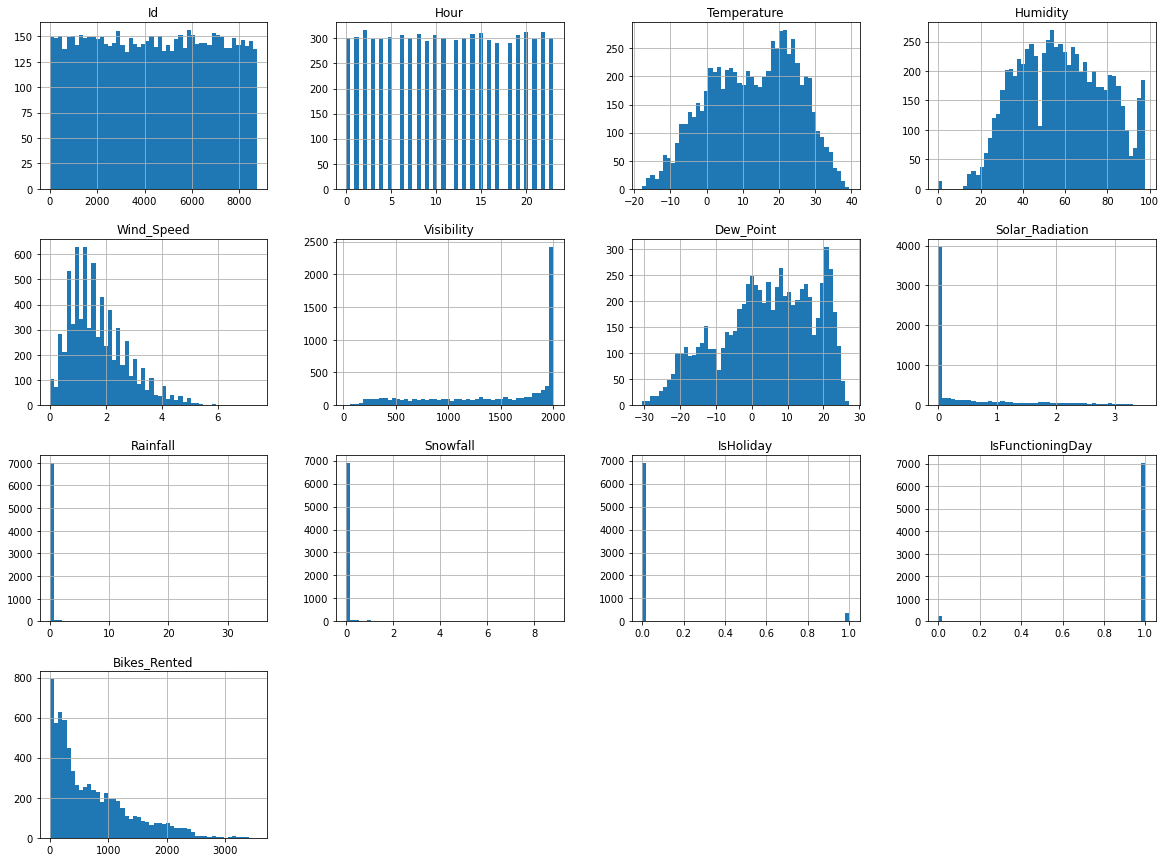

In [316]:
%matplotlib inline 
#Visulation of attributes in the dataset
import matplotlib.pyplot as plt
bikes.hist(bins=50, figsize=(20,15))
plt.show()

In [317]:
# to make this notebook's output identical at every run
import numpy as np
np.random.seed(42)

# Preprocessing the data

There's one thing that's peculiar. There are 13 dates which are classified as a Non-Functioning Day. We should remove those dates since the bike count is zero not because of lack of demand, but because the rentals are closed.

In [318]:
bikes[bikes['IsFunctioningDay']=='No']['Date'].unique()

array([], dtype='datetime64[ns]')

In [319]:
bikes[bikes['IsFunctioningDay']=='No']['Bikes_Rented'].sum() 

0.0

In [320]:
bikes=bikes[~(bikes['IsFunctioningDay'] == 'No')]
bikes=bikes.drop("IsFunctioningDay",axis=1)  
bikes=bikes.drop("Id",axis=1) # removing 'id' from the dataframe because it doesnt have statistical significance in predicting targets

In [321]:
bikes.dtypes 

Date               datetime64[ns]
Hour                        int64
Temperature               float64
Humidity                    int64
Wind_Speed                float64
Visibility                  int64
Dew_Point                 float64
Solar_Radiation           float64
Rainfall                  float64
Snowfall                  float64
Season                     object
IsHoliday                   int64
Bikes_Rented              float64
dtype: object

In [322]:
bikes_cat=bikes.select_dtypes(include=['object'])
bikes_num=bikes.select_dtypes(include=['int64','float64']) #including right type of data
bikes_num=bikes_num.drop('Bikes_Rented',axis=1)# removing this because this is the target
bikes = bikes.reset_index()

In [323]:
from sklearn.preprocessing import StandardScaler #StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way
scaler = StandardScaler()
bikes_num_std=scaler.fit_transform(bikes_num)

In [324]:
bikes_num_df=pd.DataFrame(bikes_num_std,columns=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','IsHoliday'],dtype='float64') #loading the column names into dataframe

In [325]:
bikes_cat['Season'].unique() #observing all the seasons

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

Now let's preprocess the remaining categorical input features, `'Seasons'` and `'Holiday'`

In [326]:
from sklearn.preprocessing import OneHotEncoder #google this

cat_encoder = OneHotEncoder()
bikes_cat_OH = cat_encoder.fit_transform(bikes_cat)
bikes_cat_OH.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [327]:
cat_encoder.categories_

[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)]

In [328]:

bikes_cat_df=pd.DataFrame(bikes_cat_OH.toarray(),columns=['Autumn','Spring', 'Summer', 'Winter'])

In [329]:
bikes_cat_df.head()

,Autumn,Spring,Summer,Winter
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [330]:
X=bikes_num_df.join(bikes_cat_df)

In [331]:
X.head(5)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),IsHoliday,Autumn,Spring,Summer,Winter
0,-1.658381,-1.497957,-1.044250,0.461544,0.924435,-1.647441,-0.655201,-0.128726,-0.173641,-0.23008,0.0,0.0,0.0,1.0
1,-1.514145,-1.522869,-0.995128,-0.885863,0.924435,-1.647441,-0.655201,-0.128726,-0.173641,-0.23008,0.0,0.0,0.0,1.0
2,-1.369908,-1.564389,-0.946005,-0.693376,0.924435,-1.655051,-0.655201,-0.128726,-0.173641,-0.23008,0.0,0.0,0.0,1.0
3,-1.225672,-1.580997,-0.896883,-0.789619,0.924435,-1.647441,-0.655201,-0.128726,-0.173641,-0.23008,0.0,0.0,0.0,1.0
4,-1.081435,-1.564389,-1.093373,0.557787,0.924435,-1.723542,-0.655201,-0.128726,-0.173641,-0.23008,0.0,0.0,0.0,1.0


All the processing has been done, now let us do train-test splits...

In [332]:
y=bikes['Bikes_Rented']
len(y)

7260

In [333]:
#train_test_split()

In [334]:
from sklearn.model_selection import train_test_split #why we split and using this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Data Visualisation

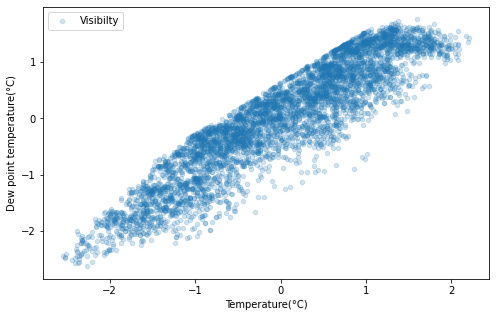

In [335]:
X_train.plot(kind="scatter", x="Temperature(°C)", y="Dew point temperature(°C)",alpha=.2,label="Visibilty", figsize=(8,5))
# scatter plot what why 
#what u found
plt.legend()
plt.show()

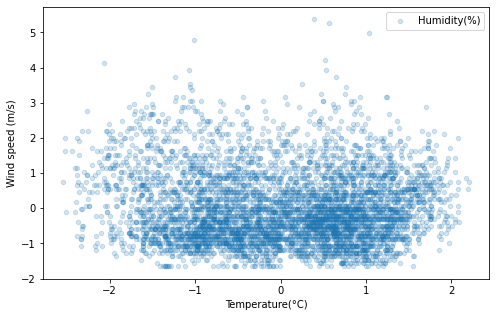

In [336]:
X_train.plot(kind="scatter", x="Temperature(°C)", y="Wind speed (m/s)",alpha=.2,label="Humidity(%)", figsize=(8,5))
# scatter plot what why 
#what u found
plt.legend()
plt.show()

<AxesSubplot:>

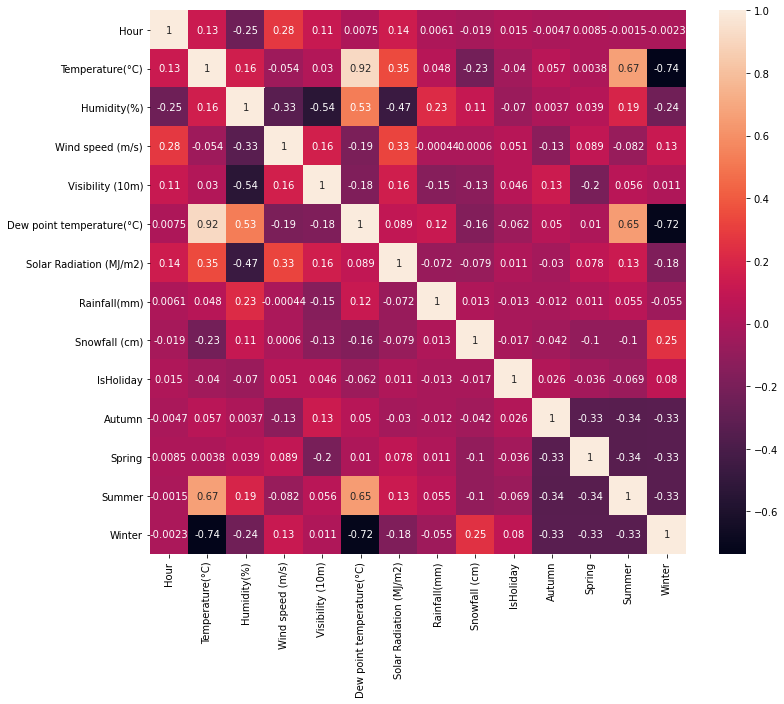

In [337]:
#Show a seaborn heatmap of correlations in X_train
plt.subplots(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [338]:
corr_matrix = bikes.corr()
corr_matrix["Bikes_Rented"].sort_values(ascending=False)

Bikes_Rented       1.000000
Temperature        0.542721
Hour               0.412558
Dew_Point          0.387701
index              0.347408
Solar_Radiation    0.261868
Visibility         0.192391
Wind_Speed         0.111693
IsHoliday         -0.067563
Rainfall          -0.120431
Snowfall          -0.143341
Humidity          -0.196400
Name: Bikes_Rented, dtype: float64

In [339]:
#as we have already seen, this data is really nice with no null/NaN values
(X_train.isnull().sum() + X_train.isna().sum()).sum()

0

In [340]:
#we now train on 6772 training examples
print(X_train.shape, X_test.shape)

(5082, 14) (2178, 14)


# Select and train a model 

## Linear Regression

In [341]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [342]:
lm = LinearRegression()
lm.fit(X_train, y_train)


# predict counts of X_test
y_pred = lm.predict(X_test)


# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred))
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error",rmse)

R2 Score: 0.4850777999409588
Mean Absolute Error: 339.77361106575535
Root Mean Squared Error 462.5870319035095


## Hyperparameter Tuning

Number of features:  14
Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.4s finished


R2 Score: 0.9999686846533538
Mean Absolute Error: 2.064913794301555
Root Mean Squared Error 2.5498535666037743


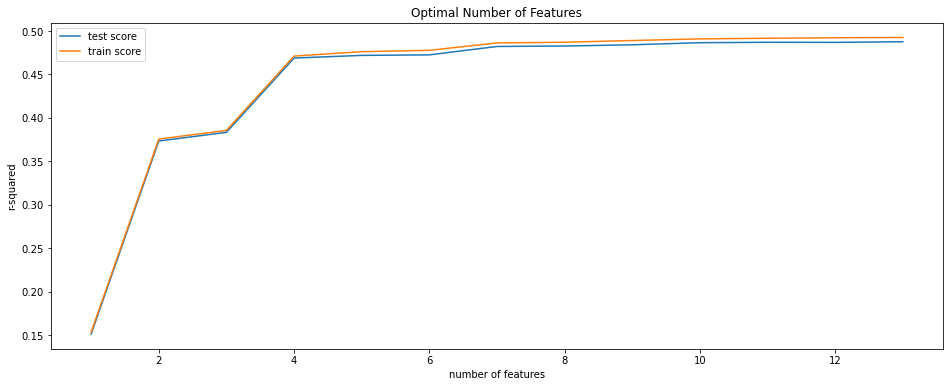

In [343]:
# Hyperparameter Tuning Using Grid Search Cross-Validation
# number of features in X_train
print("Number of features: ", len(X_train.columns))

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)
y_test = model_cv.predict(X_test)
# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred))
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error",rmse)


# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

# plotting cv results
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left');


## SVM


In [344]:
# Support Vector Machine Regression
from sklearn.svm import SVR

X = X_train
y = y_train

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [345]:
svr_lin = SVR(kernel='linear', C=1e3)

In [346]:
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

In [347]:
y_rbf = svr_rbf.fit(X, y).predict(X) 

In [349]:
y_lin = svr_lin.fit(X, y).predict(X) 

In [350]:
y_poly = svr_poly.fit(X, y).predict(X)

## hyperparameter tuning for SVM

In [351]:
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve, GridSearchCV

In [352]:
param_grid = { 'C':[0.1, 10, 100],'kernel':['rbf'],'gamma': [1, 0.1, 0.01], 'epsilon': [0.1]}
grid = GridSearchCV(SVR(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 10, 100], 'epsilon': [0.1],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']})

In [353]:

print(grid.best_params_)

print(grid.score(X_test,y_test))

{'C': 100, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.7147908826084212


In [354]:
y_pred = grid.predict(X_test)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2 : ",r2)

mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error",rmse)

R2 :  0.7147908826084212
Mean Absolute Error: 196.39001166779306
Root Mean Squared Error 243.3427047947644


### Decision Trees

In [355]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [356]:
dt_prediction = dt_reg.predict(X_test)

In [357]:
print('RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, dt_prediction)))
print('MAE:', np.sqrt(sklearn.metrics.mean_absolute_error(y_test, dt_prediction)))
print('R2:', (sklearn.metrics.r2_score(y_test, dt_prediction)))

RMSE: 467.5840502090146
MAE: 18.539087935325266
R2: -0.05304303420716949


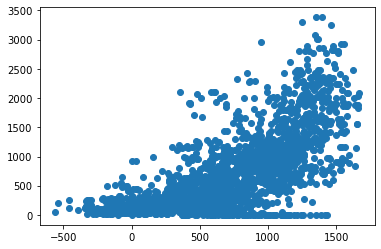

In [358]:
plt.scatter(y_test, dt_prediction)

### Random Forests

In [359]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(verbose=1,n_estimators=100, random_state=42)
forest_reg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished


RandomForestRegressor(random_state=42, verbose=1)

In [360]:
y_test = forest_reg.predict(X_test)
# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)
emse = np.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred))
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error",emse)

R2 Score: 0.8051240450881515
Mean Absolute Error: 171.74976850895206
Root Mean Squared Error 260.76283028820853


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [361]:
train_preds = forest_reg.predict(X_train)
forest_mse = sklearn.metrics.mean_squared_error(y_train, train_preds)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


110.46463072185388

In [362]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Scores: [286.76334264 315.49157828 327.77225379 272.36068193 308.34214837
 326.48751247 256.48423813 310.19464615 268.49946435 278.95379204]
Mean: 295.1349658151188
Standard deviation: 24.326325693439475


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Alright, random forests have better results than decision trees. However, it is still overfitting the training set, as the X_train MSE of 87<232 above. Regularization by snipping ``max_depth`` doesn't help, as seen below.

In [363]:
for i in range(1,20,2):
    forest_reg = RandomForestRegressor(random_state=1, max_depth=i)
    scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    print(i,":",np.sqrt(-scores).mean())

1 : 556.8583881169387
3 : 405.9915732947637
5 : 351.0561890891668
7 : 316.4093515013971
9 : 303.14182587418503
11 : 298.55880304792
13 : 295.92524255703813
15 : 295.9189802021207
17 : 295.23685319449424
19 : 295.45173446658885


## Hyperparameter Tuning for Random Forest

In [364]:
#
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)
y_test = grid_search.predict(X_test)
# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred))
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error",rmse)

R2 Score: 0.8261877965948569
Mean Absolute Error: 159.59947602007216
Root Mean Squared Error 241.33249066235467


In [365]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [366]:
np.sqrt(-grid_search.best_score_)

296.63022110762483

In [367]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [368]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, X_train.columns), reverse=True)

[(0.288553330037075, 'Hour'),
 (0.2420245010024253, 'Temperature(°C)'),
 (0.11459348909876353, 'Humidity(%)'),
 (0.08155049988173105, 'Solar Radiation (MJ/m2)'),
 (0.08024014098400656, 'Winter'),
 (0.06275463171112589, 'Dew point temperature(°C)'),
 (0.035791555957168514, 'Visibility (10m)'),
 (0.03415136352647117, 'Wind speed (m/s)'),
 (0.02888248000040447, 'Rainfall(mm)'),
 (0.011403596974036588, 'Autumn'),
 (0.007320305288845607, 'Summer'),
 (0.006790948448291492, 'Spring'),
 (0.005342619994001466, 'IsHoliday'),
 (0.0006005370956531811, 'Snowfall (cm)')]

In [369]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

final_mse = sklearn.metrics.mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [370]:
final_rmse

0.0

We can compute a 95% confidence interval for the test RMSE:

In [371]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


array([nan, nan])

## Multiple Linear Regression

In [372]:
# final model for Multiple Linear Regression
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             
rfe = rfe.fit(X_train, y_train)

# predict counts of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred))
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error",rmse)

R2 Score: 0.6281487570373183
Mean Absolute Error: 267.38658866120846
Root Mean Squared Error 352.9882760583947


## Hyperparamter Tuning for multiple linear regression

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished


0.6254112211505317
R2 Score: 0.6281487570373183
Mean Absolute Error: 267.38658866120846
Root Mean Squared Error 352.9882760583947


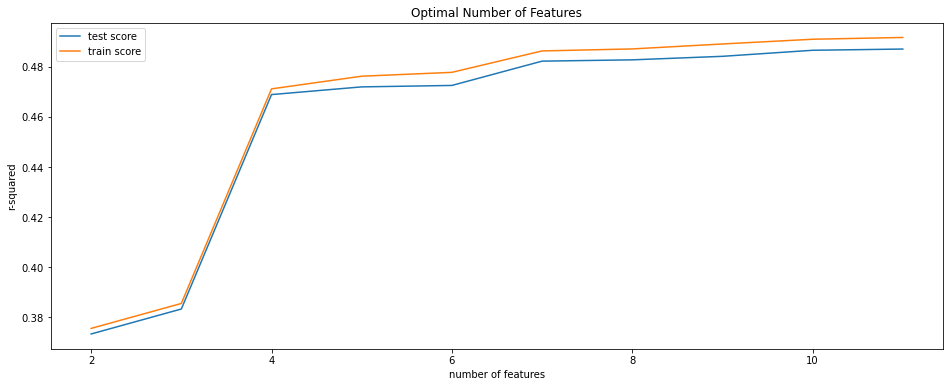

In [373]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 12))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)
y_pred=model_cv.predict(X_test)
acc = sklearn.metrics.r2_score(y_test,y_pred)
print(acc)

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred))
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error",rmse)
      
      
# plotting cv results
      
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left');


